In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import re
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("/home/kingpin/Fakenews_DL/WELFake_Dataset.csv")

# Quick look
print(df.shape)
print(df.columns)
print(df.head())

(72134, 4)
Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


In [3]:
# Overview
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None


In [4]:
# Null value check
print(df.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


label
1    0.514404
0    0.485596
Name: proportion, dtype: float64


<Axes: title={'center': 'Fake (0) vs Real (1)'}, xlabel='label'>

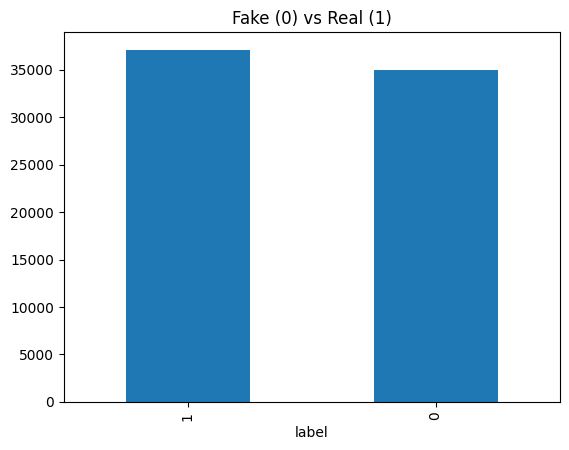

In [5]:
# Distribution of labels
print(df['label'].value_counts(normalize=True))  # Percentage
df['label'].value_counts().plot(kind='bar', title="Fake (0) vs Real (1)")


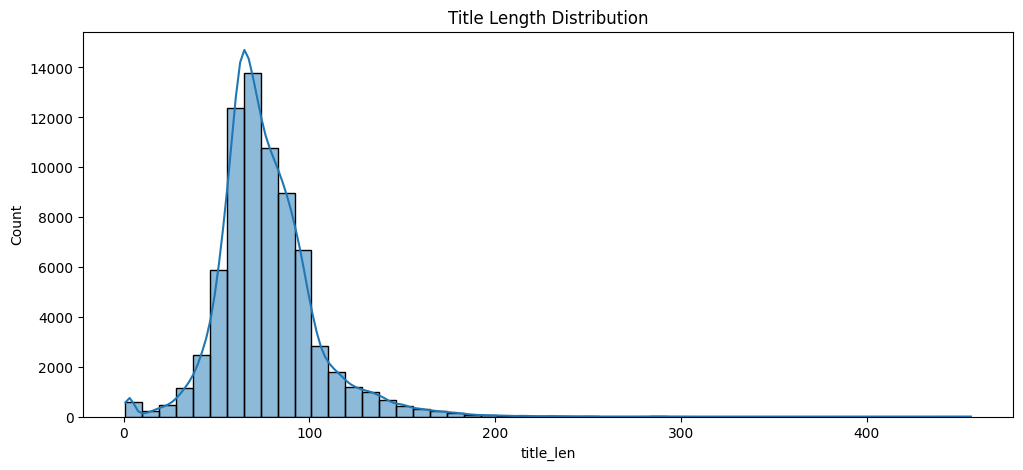

In [6]:
# Title length distribution
df['title_len'] = df['title'].astype(str).apply(len)
df['text_len'] = df['text'].astype(str).apply(len)
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='title_len', bins=50, kde=True)
plt.title("Title Length Distribution")
plt.show()